In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [9]:
device = torch.device('cuda:0')

In [3]:
from utils.data_utils import dataset_description, input_uniqueness, initial_dataloaders
from utils.data_utils import load_data_with_name

In [4]:
from utils import config

In [5]:
args = config.Args(epochs = 20, batch_size=64, 
                   AL_iters = 10, AL_batch=32, AL_select='acc',
                   init_num = 100, val_ratio =0.2, 
                   problem_type = 'binary', 
                   model_type='NN', model_args={'n_hidden':32, 'p_dropout':0.2},
                   dataset = 'german', save_model=True, save_dir = None)

need to set selection params!
save directory:  ../results/german/220203_0550


In [6]:
Xtr, Xte, ytr, yte, Ztr, Zte = load_data_with_name(args.dataset, 
                                                   svm=False, random_state=42,intercept=False)

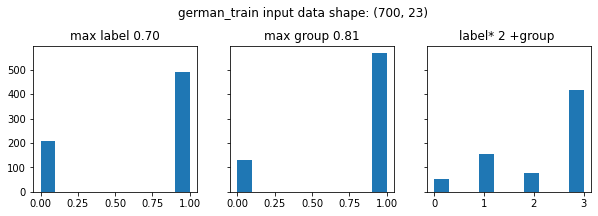

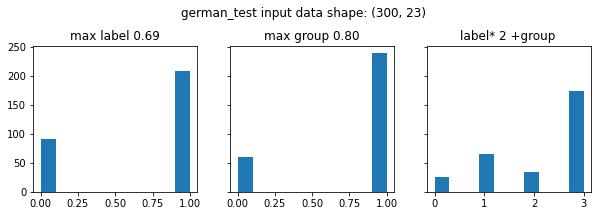

In [7]:
dataset_description(Xtr,ytr,Ztr, dataname=args.dataset+'_train')
dataset_description(Xte,yte,Zte, dataname=args.dataset+'_test')

In [8]:
input_uniqueness(Xtr,Xte)

1000 1000
satisfy uniqueness


In [9]:
args.print_args()

train epochs/batch: 20/64
AL iters/batch: 10/32
AL selection is based on  acc
initial number and validation ratio are 100/0.2
problem and models are binary/NN


In [10]:
sel_args = {"param_names":None, "last_layer":True, "sel_idxs": None, "normalize":True}
args.set_selection_params('identity',sel_args)

In [11]:
N1 = args.init_num
train_loader, select_loader, test_loader = initial_dataloaders(Xtr,ytr,Ztr,Xte,yte,Zte,N1,args)

# Train model

In [12]:
from utils.train_utils import train_AL, train_AL_valid

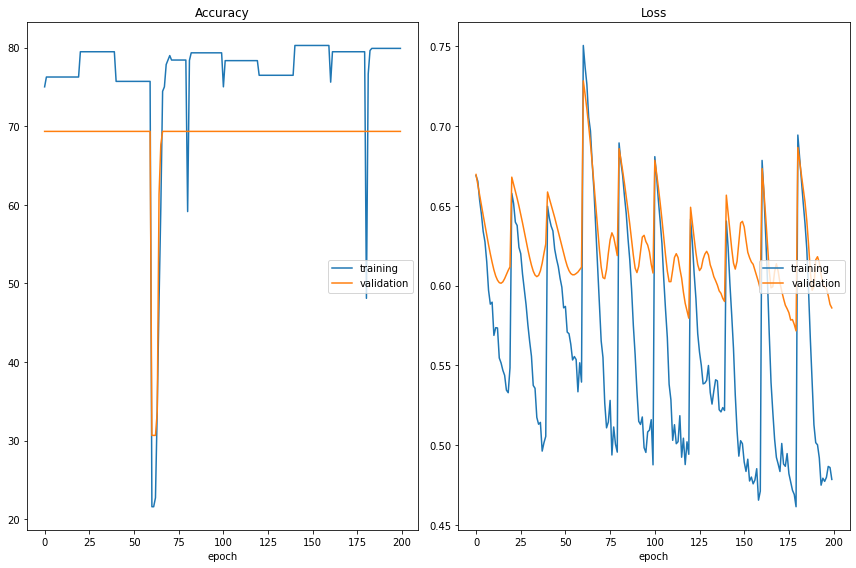

Accuracy
	training         	 (min:   21.591, max:   80.263, cur:   79.891)
	validation       	 (min:   30.667, max:   69.333, cur:   69.333)
Loss
	training         	 (min:    0.462, max:    0.750, cur:    0.479)
	validation       	 (min:    0.572, max:    0.728, cur:    0.586)
Finished Training
0.0 : loss 0.2257373183965683 / acc 100.0
1.0 : loss 0.7152793407440186 / acc 62.5
final dataloader is saved in  ../results/german/220203_0550/final_dataloader.pkl


In [13]:
clf, train_loader_p, select_loader_p = train_AL_valid(train_loader, select_loader, device, 
                                                      args, test_loader, True)